# Example of Line Fitting

### Import numpy and matplotlib

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Generate random data about trendline

In [2]:
# Set random number seed
np.random.seed(119)

# Set number of data points
npoints = 50

# Set variable x in array
x = np.linspace(0, 10., npoints)

# Set slope
m = 2.0
# Set intercept
b = 1.0
# Set scatter rms in the noise
sigma = 2.0

# Generate the y points
y = m*x + b + np.random.normal(scale = sigma, size = npoints)
y_err = np.full(npoints, sigma)




### Plot the data

Text(0, 0.5, 'y')

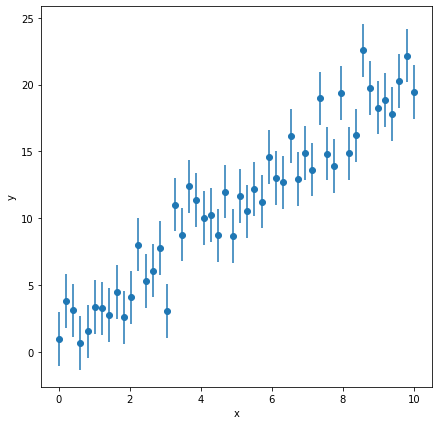

In [3]:
f = plt.figure(figsize = (7, 7))
plt.errorbar(x, y, sigma, fmt = 'o')
plt.xlabel('x')
plt.ylabel('y')

### Fitting Method 1: polyfit

In [4]:
# Weighted linear fit
m_fit, b_fit = np.poly1d(np.polyfit(x, y, 1, w = 1./y_err))
print(m_fit, b_fit)

y_fit = m_fit * x + b_fit


1.9634043470399523 1.2830106812961977


### Plot result

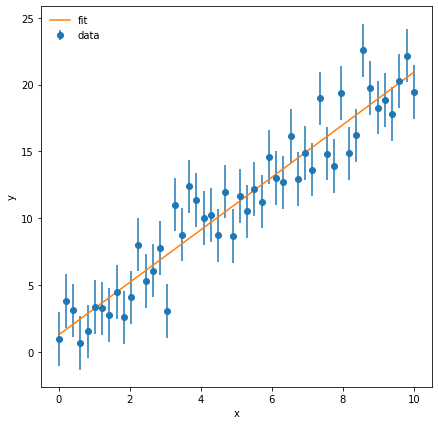

In [5]:
f = plt.figure(figsize = (7, 7))
plt.errorbar(x, y, yerr = y_err, fmt = 'o', label = 'data')
plt.plot(x, y_fit, label = 'fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 2, frameon = False)

### Plotting method 2: scipy & optimize

In [6]:
# Import optimize from scipy
from scipy import optimize

# Define the fxn to fit
def f_line(x, m, b):
    return m*x + b

# Perform fit
params, params_cov =  optimize.curve_fit(f_line, x, y, sigma = y_err)

m_fit = params[0]
b_fit = params[1]
print(m_fit, b_fit)

1.9634043457508432 1.2830106890542259


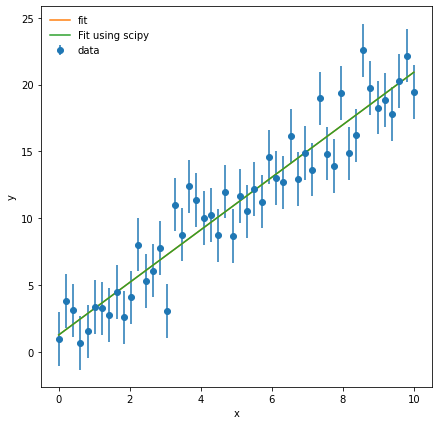

In [7]:
f = plt.figure(figsize = (7, 7))
plt.errorbar(x, y, yerr = y_err, fmt = 'o', label = 'data')
plt.plot(x, y_fit, label = 'fit')
plt.plot(x, m_fit*x + b_fit, label = 'Fit using scipy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 2, frameon = False)

### Perform a more complicated fit

Text(0, 0.5, 'y')

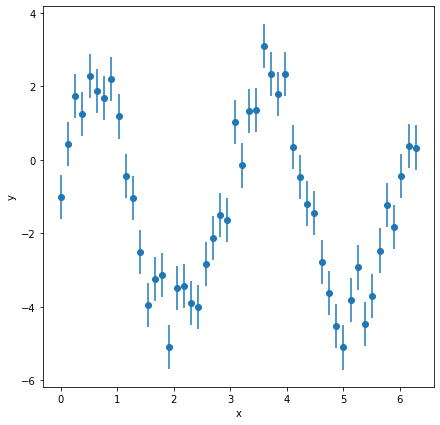

In [11]:
# Redefine x and y
npoints = 50
x = np.linspace(0., 2*np.pi, npoints)

# Define complicated fxn
a = 3.4
b = 2.1
c = 0.27
d = -1.3
sig = 0.6

y = a * np.sin(b*x + c) + d + np.random.normal(scale = sig, size = npoints)
y_err = np.full(npoints, sig)

f = plt.figure(figsize = (7, 7))
plt.errorbar(x, y, yerr = y_err, fmt ='o')
plt.xlabel('x')
plt.ylabel('y')

### Perform fit using scipy.optimize.curve_fit()

In [9]:
# Import optimize from scipy
from scipy import optimize

# Define function to fit
def f_curve(x, a, b, c, d):
    return a*np.sin(b*x + c) + d

# Perform fit
params, params_cov = optimize.curve_fit(f_curve, x, y, 
    sigma = y_err, p0 = [1, 2., 0.1, -0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit, b_fit, c_fit, d_fit)

y_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit

# a = 3.4
# b = 2.1
# c = 0.27
# d = -1.3


3.484887738993992 2.098715744869183 0.24946478785463969 -1.3321535893887204


### Plot the fit

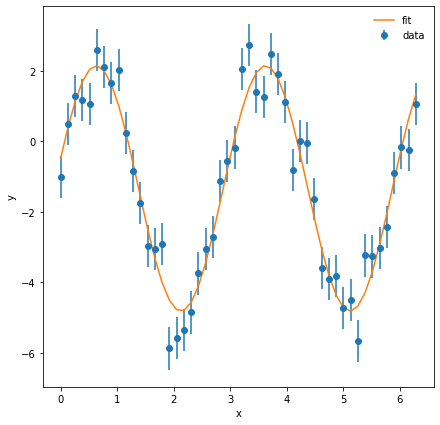

In [10]:
f = plt.figure(figsize = (7, 7))
plt.errorbar(x, y, yerr = y_err, fmt = 'o', label = 'data')
plt.plot(x, y_fit, label = 'fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 0, frameon = False)